In [3]:
import matplotlib.pyplot as plt
import scipy.integrate as si
import numpy as np

In [35]:
#ODEs

def pendulo(y,t,b,c):
    theta,omega = y
    
    dtheta_dt = omega
    domega_dt = -b*omega-c*np.sin(theta)

    return ([dtheta_dt,domega_dt])
    


<img src = "img/SIR.png" style="max-width:20%; width: 20%;">

Text(0.5, 1.0, 'Figura 1 - SIR model')

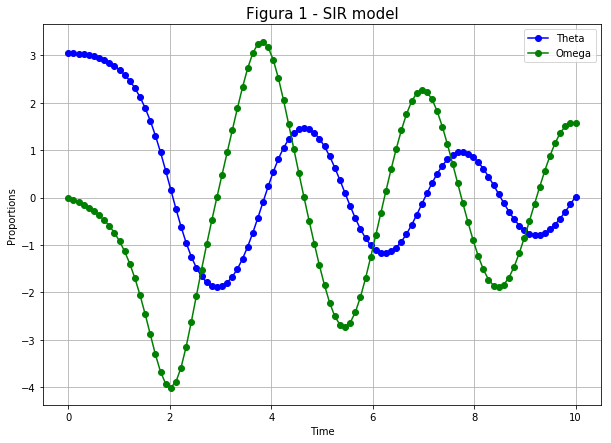

In [42]:
# Tempo
t = np.linspace(0,10,100)
# Inicial
omegao = 0
thetao = np.pi - 0.1
b = 0.25
c = 5.0



# Solução
solution = si.odeint(
    pendulo,
    [thetao,omegao],
    t,
    args = (b,c),
)
solution = np.array(solution)

# Plot 
plt.figure(figsize = (10,7))
plt.plot(t,solution[:,0],'-ob',label = 'Theta')
plt.plot(t,solution[:,1],'-og',label = 'Omega')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Proportions')
plt.title('Figura 1 - SIR model',fontsize = 15)

Observe que na Figura 2 foi introduzida a taxa de mortalidade ($\mu$) e natalidade (N) em comparação com a Figura 1. Se a doença é agressiva (altos valores de $\mu$), as pessoas infectadas tendem a não transmitir, pois morrem. Na Figura 2, foi utilizada uma taxa de mortalidade de 3% (similar ao Covid-19). Logo, observou-se que as pessoas serão ainda infectadas, e muitas irão se curar. De acordo com a Figura 2, como sempre haverão pessoas infectadas, pode-se dizer que talvez todos um dia irão ser infectados pelo covid-19 (constância da curva vermelha).

Exercícios : http://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations

### problema 1

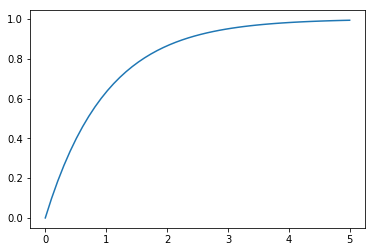

In [70]:
def ex1(y,t):
    dydt = (-y+1)
    return dydt

yo = 0
t = np.linspace(0,5)

y = si.odeint(ex1,yo,t)

plt.plot(t,y)

### problema 2

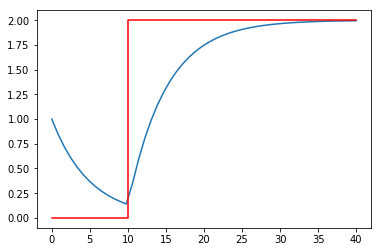

In [115]:
def ex2(y, t):
    if t <10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    
    return dydt

yo =1
t = np.linspace(0,40,50)

solution = si.odeint(ex2,yo,t)

plt.plot(t,solution)
plt.plot([0,10,10,40],[0,0,2,2],'r-',label='Input (u(t))')


### Problema 3

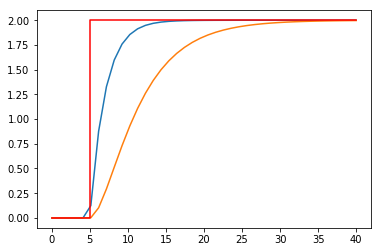

In [118]:
def ex3(z, t):
    if t < 5.0:
        u = 0
    else:
        u = 2
    
    x = z[0]
    y = z[1]
    
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    
    return [dxdt,dydt]


xo =0
yo =0
t = np.linspace(0,40,40)

solution = si.odeint(ex3,[xo,yo],t)

plt.plot(t,solution[:,0])
plt.plot(t,solution[:,1])
plt.plot([0,5,5,40],[0,0,2,2],'r-',label='Input (u(t))')


# Simulate HIV Infection

http://apmonitor.com/pdc/index.php/Main/SimulateHIV

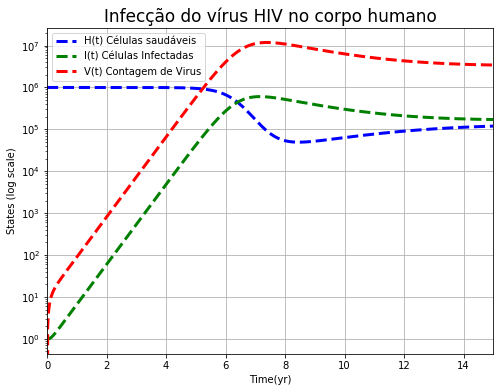

In [67]:
def hiv(y,t,k1,k2,k3,k4,k5,k6):
    
    H,I,V = y
    
    dHdt = k1 - k2*H - k3*H*V
    dIdt = k3*H*V - k4*I
    dVdt = -k3*H*V - k5*V + k6*I
    
    return dHdt,dIdt,dVdt

Ho = 1e6 # healthy cells
Io = 1 # infected cells
Vo = 0 # virus


"""
kr1 = 1e5 = new healthy cells per year
kr2 = 0.1 = death rate of healthy cells
kr3 = 2e-7 = healthy cells converting to infected cells
kr4 = 0.5 = death rate of infected cells
kr5 = 5 = death rate of virus
kr6 = 100 = production of virus by infected cells
"""

k = (1e5,0.1,2e-7,0.5,5,100)

t = np.linspace(0,20,1000)


S = si.odeint(hiv,[Ho,Io,Vo],t,args = k)

plt.figure(figsize = (8,6))
plt.semilogy(t,S[:,0],'--b',label= 'H(t) Células saudáveis',linewidth = 3)
plt.semilogy(t,S[:,1],'--g',label= 'I(t) Células Infectadas',linewidth = 3)
plt.semilogy(t,S[:,2],'--r',label= 'V(t) Contagem de Virus', linewidth = 3)
plt.legend()
plt.xlabel('Time(yr)')
plt.ylabel('States (log scale)')
plt.xlim(0,15)
plt.title('Infecção do vírus HIV no corpo humano',fontsize= 17)
plt.grid()

##### Equação Diferencial

$\frac{dH(t)}{dt} = kr_{1} - kr_{2}H(t) - kr_{3}H(t)V(t)$

$\frac{dI(t)}{dt} = kr_{3} H(t) V(t) - kr_{4}I(t)$

$\frac{dV(t)}{dt} = - kr_{3}H(t) V(t) - kr_{5}V(t) + kr_{6}I(t)$

#### As Variáveis são 
- H(t) Células saudáveis
- I(t) Células Infectadas
- V(t) Contagem de Virus

#### As Constantes são:
- novas células saudáveis por ano (kr1)
- taxa de mortalidade de células saudáveis (kr2)
- células saudáveis convertendo em células infectadas (kr3)
- taxa de mortalidade de células infectadas (kr4)
- taxa de mortalidade do vírus (kr5)
- produção de vírus pelas células infectadas (kr6)